# Problem 1

Approx. final values (from V_A): {'s1': 3.2276783037249324, 's2': 22.095602832027502}
Approx. final values (from V_B): {'s1': 3.364221922983738, 's2': 22.232146451285622}


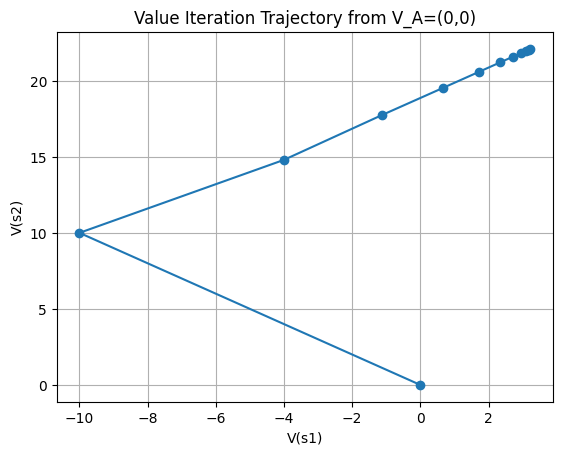

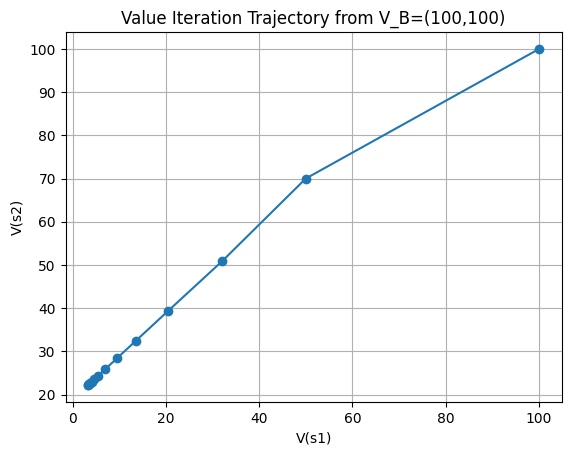

In [1]:
import matplotlib.pyplot as plt
import numpy as np

############################
# 1. Define the MDP
############################

states = ["s1","s2"]
actions = ["a1","a2","a3"]
gamma = 0.6

# Rewards:
R = {"s1": -10,  # R(s1)
     "s2":  10}  # R(s2)

# Transition probabilities: P(s' | s, a)
P = {}
# We store P in a dict so that P[("s1","a1")] is a dict of next states -> probabilities.
# For example: P[("s1","a1")] = {"s1":0.2, "s2":0.8}.
P[("s1","a1")] = {"s1":0.2, "s2":0.8}
P[("s1","a2")] = {"s1":0.4, "s2":0.6}
P[("s1","a3")] = {"s2":1.0}    # from s1 via a3 → s2 w.p.1

P[("s2","a1")] = {"s1":0.1, "s2":0.9}
# from s2 via a2 → no next states, so prob=0 for everything
P[("s2","a2")] = {}
P[("s2","a3")] = {"s1":0.5, "s2":0.5}

############################
# 2. Bellman Update
############################

def bellman_update(V_old):
    """
    Given current values V_old = (V_old(s1), V_old(s2)),
    return the next value vector V_new by max over actions.
    """
    # We'll store in a dict: V_new["s1"], V_new["s2"].
    V_new = {}
    
    for s in states:
        # For each action, compute Q(s,a) = R(s) + gamma * sum_{s'} P(s'|s,a) * V_old(s')
        Q_values = []
        for a in actions:
            # Sum over next states
            # If P[(s,a)] not found or empty, the sum is 0
            trans_dict = P.get((s,a), {})
            exp_val = 0.0
            for s_next, prob_s_next in trans_dict.items():
                exp_val += prob_s_next * V_old[s_next]
            
            Q_sa = R[s] + gamma * exp_val
            Q_values.append(Q_sa)
        
        # Now choose the best action
        V_new[s] = max(Q_values)
    
    return V_new

def max_norm_diff(V1, V2):
    """Compute the max-norm difference between two value dictionaries."""
    return max(abs(V1["s1"] - V2["s1"]), abs(V1["s2"] - V2["s2"]))

############################
# 3. Value Iteration from two initial values
############################

def value_iteration(V_init, tolerance=0.1):
    """
    Perform value iteration starting from V_init (a dict {s1->..., s2->...})
    until the result is within `tolerance` (in max norm) of convergence 
    *to the optimal fixed point*.
    
    In practice here, we will just keep iterating 
    until the difference between consecutive iterations is small enough
    to ensure we are within 0.1 of the fixed point.
    """
    # Keep track of the sequence for plotting
    trajectory = []

    V_current = dict(V_init)  # copy
    while True:
        trajectory.append( (V_current["s1"], V_current["s2"]) )

        # Bellman update
        V_next = bellman_update(V_current)
        
        # Check difference
        diff = max_norm_diff(V_current, V_next)
        
        V_current = V_next
        if diff < 0.05: 
            # A small enough threshold to ensure we're within 0.1 of V* 
            # (because each Bellman update shrinks errors by a factor gamma <= 0.6).
            break

    # Record final
    trajectory.append( (V_current["s1"], V_current["s2"]) )
    return V_current, trajectory

############################
# 4. Run from V_A and V_B
############################

# (a) Start from (0, 0)
V_init_A = {"s1": 0.0, "s2": 0.0}
V_star_A, trajA = value_iteration(V_init_A)

# (b) Start from (100, 100)
V_init_B = {"s1": 100.0, "s2": 100.0}
V_star_B, trajB = value_iteration(V_init_B)

print("Approx. final values (from V_A):", V_star_A)
print("Approx. final values (from V_B):", V_star_B)

############################
# 5. Plotting trajectories
############################

# Convert to arrays for plotting
trajA = np.array(trajA)
trajB = np.array(trajB)

# Plot 1: Trajectory from V_A
plt.figure()
plt.title("Value Iteration Trajectory from V_A=(0,0)")
plt.plot(trajA[:,0], trajA[:,1], marker='o')
plt.xlabel("V(s1)")
plt.ylabel("V(s2)")
plt.grid(True)
plt.show()

# Plot 2: Trajectory from V_B
plt.figure()
plt.title("Value Iteration Trajectory from V_B=(100,100)")
plt.plot(trajB[:,0], trajB[:,1], marker='o')
plt.xlabel("V(s1)")
plt.ylabel("V(s2)")
plt.grid(True)
plt.show()
